Decision Tree Accuracy: 0.9853658536585366

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



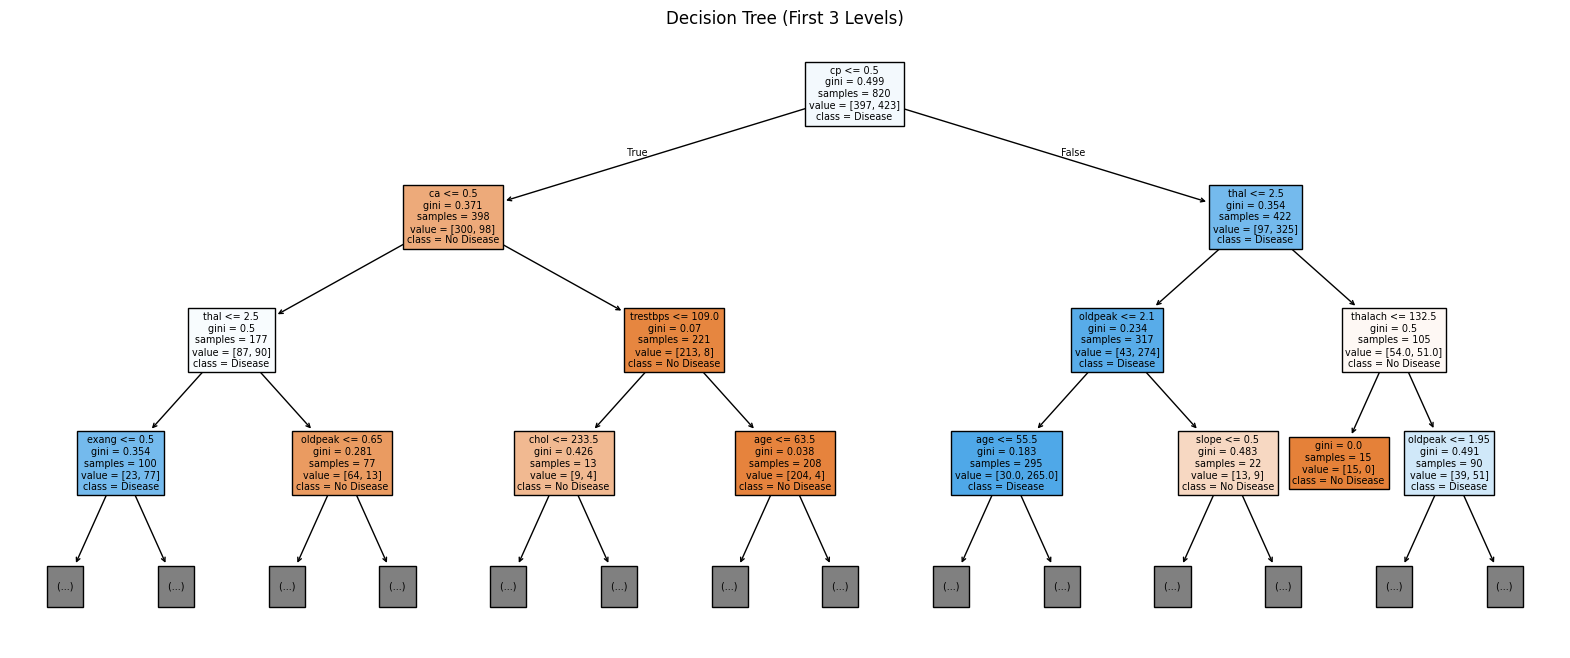

Pruned Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



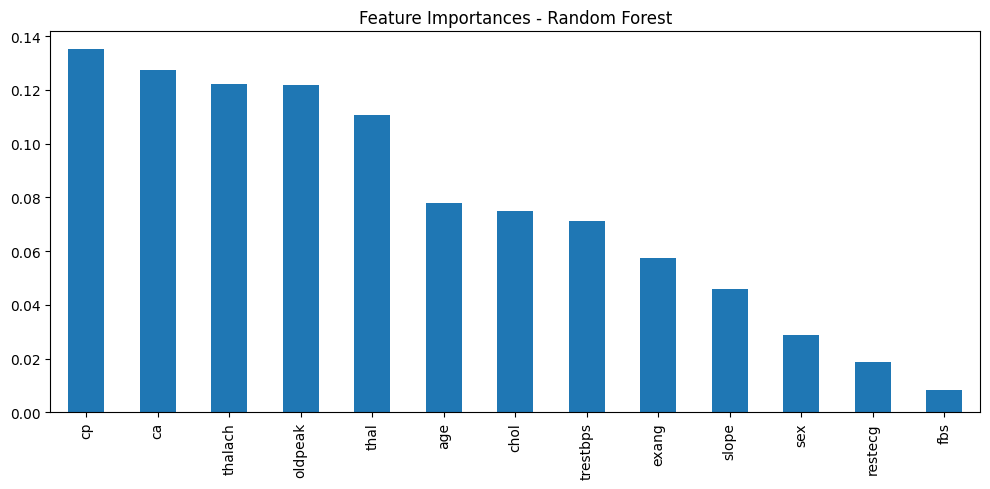

Cross-Validation Accuracy (Decision Tree, max_depth=4): 0.8341
Cross-Validation Accuracy (Random Forest): 0.9971


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(20, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()
#Control Tree Depth to reduce overfitting
dt_model_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_pruned.fit(X_train, y_train)
y_pred_pruned = dt_model_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

#Cross-Validation Accuracy
dt_cv_score = cross_val_score(dt_model_pruned, X, y, cv=5).mean()
rf_cv_score = cross_val_score(rf_model, X, y, cv=5).mean()

print(f"Cross-Validation Accuracy (Decision Tree, max_depth=4): {dt_cv_score:.4f}")
print(f"Cross-Validation Accuracy (Random Forest): {rf_cv_score:.4f}")
